In [326]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')



Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [327]:
import pandas
import requests
from bs4 import BeautifulSoup
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_text,'xml')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pandas.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighbourhood'])
df = df[~df['PostalCode'].isnull()]

df.head()

,PostalCode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


In [328]:
df.drop(df.loc[df['Borough']=='Not assigned'].index, inplace=True)
df

,PostalCode,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Downtown Toronto,Queen's Park
10,M9A,Queen's Park,Not assigned
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern
14,M3B,North York,Don Mills North


In [15]:
import pandas as pd


df_geo = pd.read_csv('http://cocl.us/Geospatial_data')

In [29]:
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [30]:
df_toronto=pandas.concat([df, df_geo], axis=1)

In [31]:
df_toronto

,PostalCode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,NaN,NaN,NaN,M1B,43.806686,-79.194353
1,NaN,NaN,NaN,M1C,43.784535,-79.160497
2,NaN,NaN,NaN,M1E,43.763573,-79.188711
3,M3A,North York,Parkwoods,M1G,43.770992,-79.216917
4,M4A,North York,Victoria Village,M1H,43.773136,-79.239476
5,M5A,Downtown Toronto,Harbourfront,M1J,43.744734,-79.239476
6,M6A,North York,Lawrence Heights,M1K,43.727929,-79.262029
7,M6A,North York,Lawrence Manor,M1L,43.711112,-79.284577
8,M7A,Downtown Toronto,Queen's Park,M1M,43.716316,-79.239476
9,NaN,NaN,NaN,M1N,43.692657,-79.264848


In [32]:
df_toronto.drop('Postal Code', axis=1)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,NaN,NaN,NaN,43.806686,-79.194353
1,NaN,NaN,NaN,43.784535,-79.160497
2,NaN,NaN,NaN,43.763573,-79.188711
3,M3A,North York,Parkwoods,43.770992,-79.216917
4,M4A,North York,Victoria Village,43.773136,-79.239476
5,M5A,Downtown Toronto,Harbourfront,43.744734,-79.239476
6,M6A,North York,Lawrence Heights,43.727929,-79.262029
7,M6A,North York,Lawrence Manor,43.711112,-79.284577
8,M7A,Downtown Toronto,Queen's Park,43.716316,-79.239476
9,NaN,NaN,NaN,43.692657,-79.264848


In [79]:
df_toronto.drop(['PostalCode','Borough'], axis=1, inplace=True)

In [80]:
df_toronto.dropna() 

,Neighbourhood,Postal Code,Latitude,Longitude
3,Parkwoods,M1G,43.770992,-79.216917
4,Victoria Village,M1H,43.773136,-79.239476
5,Harbourfront,M1J,43.744734,-79.239476
6,Lawrence Heights,M1K,43.727929,-79.262029
7,Lawrence Manor,M1L,43.711112,-79.284577
8,Queen's Park,M1M,43.716316,-79.239476
10,Not assigned,M1P,43.757410,-79.273304
11,Rouge,M1R,43.750072,-79.295849
12,Malvern,M1S,43.794200,-79.262029
14,Don Mills North,M1V,43.815252,-79.284577


In [46]:
df_1=df_toronto.dropna()

In [47]:
df_1.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
3,M3A,North York,Parkwoods,43.770992,-79.216917
4,M4A,North York,Victoria Village,43.773136,-79.239476
5,M5A,Downtown Toronto,Harbourfront,43.744734,-79.239476
6,M6A,North York,Lawrence Heights,43.727929,-79.262029
7,M6A,North York,Lawrence Manor,43.711112,-79.284577


In [35]:
df_demographics=pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv')


In [36]:
df_demographics.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

In [ ]:
df_demographics.drop(['Agincourt South-Malvern West','Annex','Banbury-Don Mills','Bay Street Corridor','Bayview Woods-Steeles','Bedford Park-Nortown','Beechborough-Greenbrook','Bendale','Black Creek','Blake-Jones','Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills','Broadview North','Brookhaven-Amesbury','Casa Loma','Centennial Scarborough','Church-Yonge Corridor','Clanton Park','Corso Italia-Davenport','Danforth','Danforth East York','Don Valley Village','Dovercourt-Wallace Emerson-Junction','Downsview-Roding-CFB','Edenbridge-Humber Valley','Eglinton East','Elms-Old Rexdale','Englemount-Lawrence','Etobicoke West Mall','Forest Hill South','Glenfield-Jane Heights','Greenwood-Coxwell','High Park North','High Park-Swansea','Humber Heights-Westmount','Humbermede'], axis=1, inplace=True)
df_demographics.drop(['Islington-City Centre West','Junction Area','Keelesdale-Eglinton West','Kensington-Chinatown','Kingsview Village-The Westway','Kingsway South','Lambton Baby Point','Lansing-Westgate','Lawrence Park North','Lawrence Park South','Leaside-Bennington','Maple Leaf','Mimico (includes Humber Bay Shores)','Moss Park','Mount Olive-Silverstone-Jamestown','Mount Pleasant East','Mount Pleasant West','Newtonbrook East','Newtonbrook West','Niagara','North Riverdale','North St. James Town','Oakwood Village','Old East York','Palmerston-Little Italy','Parkwoods-Donalda','Pelmo Park-Humberlea','Playter Estates-Danforth','Pleasant View','Princess-Rosethorn','Regent Park','Rexdale-Kipling','Rockcliffe-Smythe','Rosedale-Moore Park','Runnymede-Bloor West Village','Rustic','South Parkdale','South Riverdale','St.Andrew-Windfields','Steeles','Stonegate-Queensway','Taylor-Massey','Thistletown-Beaumond Heights','Trinity-Bellwoods','University','Waterfront Communities-The Island','West Humber-Clairville','Westminster-Branson','Weston-Pelham Park','Wexford/Maryvale','Willowdale East','Willowridge-Martingrove-Richview','Woodbine Corridor','Woodbine-Lumsden','Wychwood','Yonge-Eglinton','Yonge-St.Clair','York University Heights','Yorkdale-Glen Park'], axis=1, inplace=True)

In [49]:
df_demographics.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Alderwood,Bathurst Manor,Bayview Village,Birchcliffe-Cliffside,Cabbagetown-South St. James Town,Caledonia-Fairbank,Clairlea-Birchmount,Cliffcrest,Dorset Park,Dufferin Grove,East End-Danforth,Eringate-Centennial-West Deane,Flemingdon Park,Forest Hill North,Guildwood,Henry Farm,Highland Creek,Hillcrest Village,Humber Summit,Humewood-Cedarvale,Ionview,Kennedy Park,L'Amoreaux,Little Portugal,Long Branch,Malvern,Markland Wood,Milliken,Morningside,Mount Dennis,New Toronto,Oakridge,O'Connor-Parkview,Roncesvalles,Rouge,Scarborough Village,Tam O'Shanter-Sullivan,The Beaches,Thorncliffe Park,Victoria Village,West Hill,Weston,Willowdale West,Woburn
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,20,34,52,122,71,109,120,123,126,83,62,11,44,102,140,53,134,48,21,106,125,124,117,84,19,132,12,130,135,115,18,121,54,86,131,139,118,63,55,43,136,113,37,137
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,Emerging Neighbourhood,No Designation,No Designation,NIA,NIA,No Designation,NIA,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,NIA,NIA,NIA,No Designation,NIA
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","12,054","15,873","21,396","22,291","11,669","9,955","26,984","15,935","25,003","11,785","21,381","18,588","21,933","12,806","9,917","15,723","12,494","16,934","12,416","14,365","13,641","17,123","43,993","15,559","10,084","43,794","10,554","26,572","17,455","13,593","11,463","13,845","18,675","14,974","46,496","16,724","27,446","21,567","21,108","17,510","27,392","17,992","16,936","53,485"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","11,904","15,434","17,671","21,856","12,053","9,851","24,770","15,703","24,363","11,449","20,839","18,810","22,168","12,474","9,816","11,333","13,097","17,656","12,525","14,108","13,091","17,058","44,919","12,050","9,632","45,086","10,436","27,167","17,587","13,145","10,900","13,497","18,316","15,050","45,912","16,609","27,398","21,130","19,225","17,182","26,547","18,170","15,004","53,350"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,1.30%,2.80%,21.10%,2.00%,-3.20%,1.10%,8.90%,1.50%,2.60%,2.90%,2.60%,-1.20%,-1.10%,2.70%,1.00%,38.70%,-4.60%,-4.10%,-0.90%,1.80%,4.20%,0.40%,-2.10%,29.10%,4.70%,-2.90%,1.10%,-2.20%,-0.80%,3.40%,5.20%,2.60%,2.00%,-0.50%,1.30%,0.70%,0.20%,2.10%,9.80%,1.90%,3.20%,-1.00%,12.90%,0.30%


In [52]:
df_demographics.columns = df_demographics.columns.str.replace("'"," ")

In [53]:
df_demographics.drop(['Birchcliffe-Cliffside'], axis=1, inplace=True)

In [56]:
df_demographics.drop(['Category','Topic','Data Source'], axis=1, inplace=True)

In [57]:
df_demographics.drop(['_id','Agincourt North','Cabbagetown-South St. James Town','Caledonia-Fairbank','Clairlea-Birchmount','Cliffcrest', 'Dorset Park', 'Dufferin Grove','East End-Danforth','Eringate-Centennial-West Deane'], axis=1, inplace=True)

In [58]:
df_demographics.drop(['Forest Hill North','Humber Summit','L Amoreaux', 'Long Branch','Mount Dennis','New Toronto', 'Oakridge','Roncesvalles','Tam O Shanter-Sullivan','Weston','Willowdale West'], axis=1, inplace=True)

In [79]:
df_2=df_demographics.drop(df_demographics.index[100:2382])

In [82]:
df_1=df_2.drop(df_2.index[40:100])

In [86]:
df=df_1.drop(df_1.index[15:40])

In [91]:
df_4=df.dropna()

In [95]:
df=df_4.drop(df_4.index[13])

In [97]:
df=df.drop(df.index[1:6])

In [101]:
df_1=df.drop(df.index[0:1])

In [105]:
df_1=df_1.drop(df_1.index[0])

In [106]:
df_1

,Characteristic,City of Toronto,Alderwood,Bathurst Manor,Bayview Village,Flemingdon Park,Guildwood,Henry Farm,Highland Creek,Hillcrest Village,Humewood-Cedarvale,Ionview,Kennedy Park,Little Portugal,Malvern,Markland Wood,Milliken,Morningside,O Connor-Parkview,Rouge,Scarborough Village,The Beaches,Thorncliffe Park,Victoria Village,West Hill,Woburn
9,Children (0-14 years),"398,135","1,760","2,325","2,415","4,385","1,295","2,505","1,545","2,115","2,165","2,310","2,775","1,400","7,910","1,340","3,675","2,880","3,110","7,960","3,365","3,825","5,600","2,630","4,635","9,625"
10,Youth (15-24 years),"340,270","1,235","1,940","2,505","3,060","1,065","2,330","1,925","2,170","1,610","1,645","2,175","1,605","6,620","1,165","3,195","2,690","2,385","6,700","2,360","2,075","2,455","2,030","3,950","7,660"
11,Working Age (25-54 years),"1,229,555","5,220","6,655","10,310","9,185","3,370","8,045","4,620","6,060","7,005","6,050","7,120","9,385","17,865","3,600","10,565","6,840","7,855","18,510","6,685","9,590","9,020","7,170","10,765","21,945"
12,Pre-retirement (55-64 years),"336,670","1,825","2,030","2,540","2,335","1,555","1,390","2,020","2,265","1,650","1,720","2,510","1,325","5,535","1,735","4,030","2,355","2,650","6,690","2,095","3,140","1,665","2,270","3,785","6,245"
13,Seniors (65+ years),"426,945","2,015","2,940","3,615","2,980","2,635","1,460","2,395","4,305","1,940","1,890","2,550","1,855","5,890","2,705","5,115","2,695","2,690","6,625","2,225","2,955","2,365","3,405","4,240","8,010"
14,Older Seniors (85+ years),"66,000",320,710,610,285,540,135,190,630,280,245,330,255,445,535,880,355,430,685,430,265,425,570,625,"1,130"


In [108]:
df_1.set_index('Characteristic', inplace=True)

In [109]:
df_1

,City of Toronto,Alderwood,Bathurst Manor,Bayview Village,Flemingdon Park,Guildwood,Henry Farm,Highland Creek,Hillcrest Village,Humewood-Cedarvale,Ionview,Kennedy Park,Little Portugal,Malvern,Markland Wood,Milliken,Morningside,O Connor-Parkview,Rouge,Scarborough Village,The Beaches,Thorncliffe Park,Victoria Village,West Hill,Woburn
Characteristic,,,,,,,,,,,,,,,,,,,,,,,,,
Children (0-14 years),"398,135","1,760","2,325","2,415","4,385","1,295","2,505","1,545","2,115","2,165","2,310","2,775","1,400","7,910","1,340","3,675","2,880","3,110","7,960","3,365","3,825","5,600","2,630","4,635","9,625"
Youth (15-24 years),"340,270","1,235","1,940","2,505","3,060","1,065","2,330","1,925","2,170","1,610","1,645","2,175","1,605","6,620","1,165","3,195","2,690","2,385","6,700","2,360","2,075","2,455","2,030","3,950","7,660"
Working Age (25-54 years),"1,229,555","5,220","6,655","10,310","9,185","3,370","8,045","4,620","6,060","7,005","6,050","7,120","9,385","17,865","3,600","10,565","6,840","7,855","18,510","6,685","9,590","9,020","7,170","10,765","21,945"
Pre-retirement (55-64 years),"336,670","1,825","2,030","2,540","2,335","1,555","1,390","2,020","2,265","1,650","1,720","2,510","1,325","5,535","1,735","4,030","2,355","2,650","6,690","2,095","3,140","1,665","2,270","3,785","6,245"
Seniors (65+ years),"426,945","2,015","2,940","3,615","2,980","2,635","1,460","2,395","4,305","1,940","1,890","2,550","1,855","5,890","2,705","5,115","2,695","2,690","6,625","2,225","2,955","2,365","3,405","4,240","8,010"
Older Seniors (85+ years),"66,000",320,710,610,285,540,135,190,630,280,245,330,255,445,535,880,355,430,685,430,265,425,570,625,"1,130"


In [110]:
df_1.index.name=None

In [335]:
df_1

,City of Toronto,Alderwood,Bathurst Manor,Bayview Village,Flemingdon Park,Guildwood,Henry Farm,Highland Creek,Hillcrest Village,Humewood-Cedarvale,Ionview,Kennedy Park,Little Portugal,Malvern,Markland Wood,Milliken,Morningside,O Connor-Parkview,Rouge,Scarborough Village,The Beaches,Thorncliffe Park,Victoria Village,West Hill,Woburn
Children (0-14 years),"398,135","1,760","2,325","2,415","4,385","1,295","2,505","1,545","2,115","2,165","2,310","2,775","1,400","7,910","1,340","3,675","2,880","3,110","7,960","3,365","3,825","5,600","2,630","4,635","9,625"
Youth (15-24 years),"340,270","1,235","1,940","2,505","3,060","1,065","2,330","1,925","2,170","1,610","1,645","2,175","1,605","6,620","1,165","3,195","2,690","2,385","6,700","2,360","2,075","2,455","2,030","3,950","7,660"
Working Age (25-54 years),"1,229,555","5,220","6,655","10,310","9,185","3,370","8,045","4,620","6,060","7,005","6,050","7,120","9,385","17,865","3,600","10,565","6,840","7,855","18,510","6,685","9,590","9,020","7,170","10,765","21,945"
Pre-retirement (55-64 years),"336,670","1,825","2,030","2,540","2,335","1,555","1,390","2,020","2,265","1,650","1,720","2,510","1,325","5,535","1,735","4,030","2,355","2,650","6,690","2,095","3,140","1,665","2,270","3,785","6,245"
Seniors (65+ years),"426,945","2,015","2,940","3,615","2,980","2,635","1,460","2,395","4,305","1,940","1,890","2,550","1,855","5,890","2,705","5,115","2,695","2,690","6,625","2,225","2,955","2,365","3,405","4,240","8,010"
Older Seniors (85+ years),"66,000",320,710,610,285,540,135,190,630,280,245,330,255,445,535,880,355,430,685,430,265,425,570,625,"1,130"


In [336]:
df_10=df_1.transpose()

In [337]:
df_10.columns = df_10.columns.str.replace("(","")

In [338]:
df_10.columns = df_10.columns.str.replace(")","")
df_11

,Children,Youth,WorkingAge,Preretirement,Seniors
City of Toronto,"398,135","340,270","1,229,555","336,670","426,945"
Alderwood,"1,760","1,235","5,220","1,825","2,015"
Bathurst Manor,"2,325","1,940","6,655","2,030","2,940"
Bayview Village,"2,415","2,505","10,310","2,540","3,615"
Flemingdon Park,"4,385","3,060","9,185","2,335","2,980"
Guildwood,"1,295","1,065","3,370","1,555","2,635"
Henry Farm,"2,505","2,330","8,045","1,390","1,460"
Highland Creek,"1,545","1,925","4,620","2,020","2,395"
Hillcrest Village,"2,115","2,170","6,060","2,265","4,305"
Humewood-Cedarvale,"2,165","1,610","7,005","1,650","1,940"


In [339]:
df_11=df_10.transpose()

In [340]:
df_11=df=df_11.drop(df_11.index[5])


In [341]:
df_11=df_11.transpose()

In [342]:
df_12=df_11.transpose()

In [343]:
df_11.columns = df_11.columns.str.replace( "_","")

In [353]:
df_16

,Children,Youth,WorkingAge,Preretirement,Seniors
Alderwood,1760,1235,5220,1825,2015
BathurstManor,2325,1940,6655,2030,2940
BayviewVillage,2415,2505,10310,2540,3615
Flemingdon Park,4385,3060,9185,2335,2980
Guildwood,1295,1065,3370,1555,2635
HenryFarm,2505,2330,8045,1390,1460
HighlandCreek,1545,1925,4620,2020,2395
HillcrestVillage,2115,2170,6060,2265,4305
HumewoodCedarvale,2165,1610,7005,1650,1940
Ionview,2310,1645,6050,1720,1890


In [344]:
!pip install pandas
import pandas as pd
df_15=pd.DataFrame({'Children':[398135,1760,2325,2415,4385,1295,2505,1545,2115,2165,2310,2775,1400,7910,1340,3675,2880,3110,7960,3365,3825,5600,2630,4635,9625],'Youth':[340270,1235,1940,2505,3060,1065,2330,1925,2170,1610,1645,2175,1605,6620,1165,3195,2690,2385,6700,2360,2075,2455,2030,3950,7660],'WorkingAge':[1229555,5220,6655,10310,9185,3370,8045,4620,6060,7005,6050,7120,9385,17865,3600,10565,6840,7855,18510,6685,9590,9020,7170,10765,21945],'Preretirement':[336670,1825,2030,2540,2335,1555,1390,2020,2265,1650,1720,2510,1325,5535,1735,4030,2355,2650,6690,2095,3140,1665,2270,3785,6245],'Seniors':[426945,2015,2940,3615,2980,2635,1460,2395,4305,1940,1890,2550,1855,5890,2705,5115,2695,2690,6625,2225,2955,2365,3405,4240,8010]},columns=['Children','Youth','WorkingAge','Preretirement','Seniors'],index=['City of Toronto','Alderwood','BathurstManor','BayviewVillage','Flemingdon Park','Guildwood','HenryFarm','HighlandCreek','HillcrestVillage','HumewoodCedarvale','Ionview','KennedyPark','LittlePortugal','Malvern','MarklandWood','Milliken','Morningside','OConnorParkview','Rouge','ScarboroughVillage','TheBeaches','ThorncliffePark','VictoriaVillage','WestHill','Woburn'])

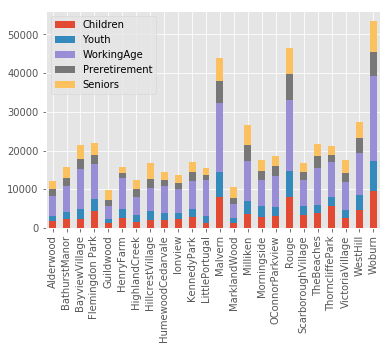

In [330]:
df_16.plot(kind='bar', stacked=True)


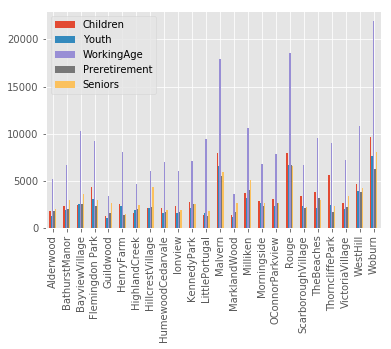

In [332]:
df_16.plot(kind='bar', stacked=False)

In [345]:
df_tdot=df_toronto.dropna()

In [346]:
df_tdot

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
3,M3A,North York,Parkwoods,43.770992,-79.216917
4,M4A,North York,Victoria Village,43.773136,-79.239476
5,M5A,Downtown Toronto,Harbourfront,43.744734,-79.239476
6,M6A,North York,Lawrence Heights,43.727929,-79.262029
7,M6A,North York,Lawrence Manor,43.711112,-79.284577
8,M7A,Downtown Toronto,Queen's Park,43.716316,-79.239476
10,M9A,Queen's Park,Not assigned,43.757410,-79.273304
11,M1B,Scarborough,Rouge,43.750072,-79.295849
12,M1B,Scarborough,Malvern,43.794200,-79.262029
14,M3B,North York,Don Mills North,43.815252,-79.284577


In [347]:
from geopy.geocoders import Nominatim

address = 'Toronto Canada'

geolocator = Nominatim(user_agent="tdot_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [348]:
import folium
map_toronto = folium.Map(location=[43.653963, -79.387207], zoom_start=10)
for lat, lng, borough, neighbourhood in zip(df_tdot['Latitude'], df_tdot['Longitude'], df_tdot['Borough'], df_tdot['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [352]:
Toronto_dat

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.770992,-79.216917
1,M4A,North York,Victoria Village,43.773136,-79.239476
2,M6A,North York,Lawrence Heights,43.727929,-79.262029
3,M6A,North York,Lawrence Manor,43.711112,-79.284577
4,M3B,North York,Don Mills North,43.815252,-79.284577
5,M6B,North York,Glencairn,43.786947,-79.385975
6,M3C,North York,Flemingdon Park,43.739015,-79.506944
7,M3C,North York,Don Mills South,43.728496,-79.495697
8,M2H,North York,Hillcrest Village,43.711695,-79.416936
9,M3H,North York,Bathurst Manor,43.696948,-79.411307


In [351]:
map_toronto = folium.Map(location=[43.653963, -79.387207], zoom_start=10)
for lat, lng, borough, neighbourhood in zip(Toronto_dat['Latitude'], Toronto_dat['Longitude'], Toronto_dat['Borough'], Toronto_dat['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [302]:
# The code was removed by Watson Studio for sharing.

In [305]:
Toronto_dat.loc[1, 'Neighbourhood']

'Victoria Village'

In [308]:
neighbourhood_latitude = Toronto_dat.loc[0, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = Toronto_dat.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood_name = Toronto_dat.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Parkwoods are 43.7709921, -79.21691740000001.


In [309]:
radius = 500 # define radius
LIMIT = 100 # limit of number of venues returned by Foursquare API
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION,  neighbourhood_latitude, neighbourhood_longitude, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=5Q4PR2Q2PTM0USLKJ2UM4ORWU0LG2FE4IGB3MSVB0B2UXURN&client_secret=DBTJY3WNMUVYRCFPN1FOD3W2ISFP03PY0ETY21AMG4URDBTI&v=20180605&ll=43.7709921,-79.21691740000001&radius=500&limit=100'

In [310]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e30bc3d1835dd001b9a1b4d'},
 'response': {'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.7754921045, 'lng': -79.21069729639068},
   'sw': {'lat': 43.7664920955, 'lng': -79.22313750360935}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cc1d28c06c254815ac18547',
       'name': 'Starbucks',
       'location': {'address': '300 Borough Dr',
        'crossStreet': 'Scarborough Town Centre',
        'lat': 43.770037201625215,
        'lng': -79.22115586641958,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.770037201625215,
          'lng': -79.22115586641958}],
        'distance': 356,
        'cc': 'CA

In [311]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [312]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Starbucks,Coffee Shop,43.770037,-79.221156
1,Tim Hortons,Coffee Shop,43.770827,-79.223078
2,Korean Grill House,Korean Restaurant,43.770812,-79.214502
3,Leslie & Giles Insurance Limited,Insurance Office,43.773116,-79.219559


In [313]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [314]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [315]:
Toronto_venues = getNearbyVenues(names=Toronto_dat['Neighbourhood'],
                                   latitudes=Toronto_dat['Latitude'],
                                   longitudes=Toronto_dat['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Heights
Lawrence Manor
Don Mills North
Glencairn
Flemingdon Park
Don Mills South
Hillcrest Village
Bathurst Manor
Downsview North
Wilson Heights
Fairview
Henry Farm
Oriole
Northwood Park
York University
Bayview Village
CFB Toronto
Downsview East


In [316]:
print(Toronto_venues.shape)
Toronto_venues.head()


(205, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.770992,-79.216917,Starbucks,43.770037,-79.221156,Coffee Shop
1,Parkwoods,43.770992,-79.216917,Tim Hortons,43.770827,-79.223078,Coffee Shop
2,Parkwoods,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean Restaurant
3,Parkwoods,43.770992,-79.216917,Leslie & Giles Insurance Limited,43.773116,-79.219559,Insurance Office
4,Victoria Village,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant


In [317]:

Toronto_venues.groupby('Neighbourhood').count()


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bathurst Manor,4,4,4,4,4,4
CFB Toronto,10,10,10,10,10,10
Don Mills North,2,2,2,2,2,2
Don Mills South,2,2,2,2,2,2
Downsview East,3,3,3,3,3,3
Downsview North,21,21,21,21,21,21
Fairview,52,52,52,52,52,52
Flemingdon Park,6,6,6,6,6,6
Glencairn,4,4,4,4,4,4


In [320]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 102 uniques categories.


In [321]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighbourhood'] = Toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighbourhood,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Climbing Gym,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Empanada Restaurant,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,History Museum,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Liquor Store,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Poutine Place,Pub,Record Shop,Restaurant,Sandwich Place,Shopping Mall,Shopping Plaza,Skating Rink,Soccer Field,Southern / Soul Food Restaurant,Stadium,Sushi Restaurant,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [322]:
Toronto_onehot.shape

(205, 103)

In [323]:
Toronto_grouped = Toronto_onehot.groupby('Neighbourhood').mean().reset_index()
Toronto_grouped

,Neighbourhood,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Climbing Gym,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Empanada Restaurant,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,History Museum,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Liquor Store,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Poutine Place,Pub,Record Shop,Restaurant,Sandwich Place,Shopping Mall,Shopping Plaza,Skating Rink,Soccer Field,Southern / Soul Food Restaurant,Stadium,Sushi Restaurant,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Bathurst Manor,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.250000,0.000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
1,CFB Toronto,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.100000,0.000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.100000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.00,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Don Mills North,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Don Mills Sout

In [324]:
Toronto_grouped.shape

(19, 103)

In [367]:
num_top_venues = 5

for hood in Toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor----
               venue  freq
0      Jewelry Store  0.25
1              Trail  0.25
2   Sushi Restaurant  0.25
3               Park  0.25
4  Korean Restaurant  0.00


----CFB Toronto----
               venue  freq
0        Coffee Shop   0.1
1         Beer Store   0.1
2               Park   0.1
3        Pizza Place   0.1
4  Convenience Store   0.1


----Don Mills North----
                   venue  freq
0                   Park   0.5
1             Playground   0.5
2  Performing Arts Venue   0.0
3           Noodle House   0.0
4              Nightclub   0.0


----Don Mills South----
                 venue  freq
0       Baseball Field   0.5
1           Food Truck   0.5
2  American Restaurant   0.0
3    Korean Restaurant   0.0
4         Noodle House   0.0


----Downsview East----
                 venue  freq
0          Pizza Place  0.33
1          Music Store  0.33
2  Empanada Restaurant  0.33
3  American Restaurant  0.00
4         Liquor Store  0.00


----Downsview Nort

In [368]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [369]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bathurst Manor,Park,Trail,Sushi Restaurant,Jewelry Store,Cupcake Shop,Coffee Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant
1,CFB Toronto,Park,Cosmetics Shop,Coffee Shop,Café,Pet Store,Pizza Place,Liquor Store,Beer Store,Shopping Plaza,Convenience Store
2,Don Mills North,Park,Playground,Climbing Gym,Coffee Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store
3,Don Mills South,Baseball Field,Food Truck,Yoga Studio,Department Store,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store
4,Downsview East,Pizza Place,Music Store,Empanada Restaurant,Yoga Studio,Cupcake Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping


In [370]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 4, 2, 3, 1, 1, 1, 1, 1], dtype=int32)

In [375]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Clster Label', kmeans.labels_)

Toronto_merged = Toronto_dat

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

Toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Clster Label,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.770992,-79.216917,1.0,1.0,Coffee Shop,Insurance Office,Korean Restaurant,Deli / Bodega,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store
1,M4A,North York,Victoria Village,43.773136,-79.239476,1.0,1.0,Bank,Hakka Restaurant,Athletics & Sports,Gas Station,Bakery,Thai Restaurant,Caribbean Restaurant,Fried Chicken Joint,Construction & Landscaping,Cuban Restaurant
2,M6A,North York,Lawrence Heights,43.727929,-79.262029,1.0,1.0,Discount Store,Coffee Shop,Hobby Shop,Convenience Store,Department Store,Deli / Bodega,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant
3,M6A,North York,Lawrence Manor,43.711112,-79.284577,1.0,1.0,Bakery,Bus Line,Park,Metro Station,Bus Station,Ice Cream Shop,Soccer Field,Intersection,Cupcake Shop,College Auditorium
4,M3B,North York,Don Mills North,43.815252,-79.284577,4.0,4.0,Park,Playground,Climbing Gym,Coffee Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store


In [380]:
import matplotlib.cm as cm
import matplotlib.colors as colors

#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighbourhood'], Toronto_merged['Clster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [382]:
Toronto_merged.loc[Toronto_merged['Clster Label'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Clster Label,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,North York,0.0,0.0,Garden,Pool,Yoga Studio,Cupcake Shop,Coffee Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping


In [383]:
Toronto_merged.loc[Toronto_merged['Cluster Label'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Clster Label,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,North York,2.0,2.0,Baseball Field,Food Truck,Yoga Studio,Department Store,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store


In [384]:

Toronto_merged.loc[Toronto_merged['Cluster Label'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]


,Borough,Clster Label,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,North York,3.0,3.0,Pizza Place,Music Store,Empanada Restaurant,Yoga Studio,Cupcake Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping


In [385]:

Toronto_merged.loc[Toronto_merged['Cluster Label'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Clster Label,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,North York,4.0,4.0,Park,Playground,Climbing Gym,Coffee Shop,College Arts Building,College Auditorium,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store
